## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


## Unzip Data

[Data-link](https://osf.io/ysaq2/)

In [ ]:
import os
os.makedirs('/content/data/train_imgs/sequence090318-C2C12P7_F0017')
%%capture 
#Simply adding &> /dev/null to the tail of any command will silence its output outside of any errors that may arise.
!unzip '/content/gdrive/MyDrive/Datas/Cell_Motility/C2C12_myoblast_cells/090318-C2C12P7_F0017.zip' -d '/content/data/train_imgs/sequence090318-C2C12P7_F0017'

MPM data extraction

In [ ]:
%%capture 
!unzip '/content/gdrive/MyDrive/Datas/Cell_Motility/C2C12_myoblast_cells/data/data.zip' -d '/content/gdrive/MyDrive/Datas/Cell_Motility/C2C12_myoblast_cells/data'

## MPM Ground Truth Extraction

$   
    author = Hayashida, Junya and Nishimura, Kazuya and Bise, Ryoma
    title = MPM: Joint Representation of Motion and Position Map for Cell Tracking,
    booktitle = The IEEE Conference on Computer Vision and Pattern Recognition (CVPR),
    month = June,
    year = 2020
}$

[Paper](https://deepai.org/publication/mpm-joint-representation-of-motion-and-position-map-for-cell-tracking)

<h3>MPM: Joint Representation of Motion and Position Map for Cell Tracking</h3>
<div>
<img src="https://images.deepai.org/converted-papers/2002.10749/x1.png" width="630"/><div>
</div></div>



<div>
<img src="https://images.deepai.org/converted-papers/2002.10749/x4.png" width="330"/>
<div></div>
</div>

<div>
<img src="https://images.deepai.org/converted-papers/2002.10749/x5.png" width="530"/>
<div></div>
</div>


**Requirements**

*   Python version==3.7.12
*   hydra-core version==1.0.5
*   pytorch version==1.4.0




In [ ]:
%%capture
!pip install hydra-core==1.0.5

In [ ]:
%%capture
!pip install torch==1.4.0

In [ ]:
!python /content/gdrive/MyDrive/Codes/Python/MOT/MPM/mpm_generator.py

/usr/local/lib/python3.7/dist-packages/hydra/core/utils.py:208: UserWarning: 
Using config_path to specify the config name is deprecated, specify the config name via config_name
See https://hydra.cc/docs/next/upgrades/0.11_to_1.0/config_path_changes
  warnings.warn(category=UserWarning, message=msg)
interval 1
interval1---frame0---id105: 100% 105/105 [00:08<00:00, 12.97it/s]
interval1---frame1---id105: 100% 105/105 [00:08<00:00, 12.76it/s]
interval1---frame2---id105: 100% 105/105 [00:08<00:00, 12.27it/s]
interval1---frame3---id105: 100% 105/105 [00:08<00:00, 12.76it/s]
interval1---frame4---id105: 100% 105/105 [00:08<00:00, 12.89it/s]
interval1---frame5---id105: 100% 105/105 [00:07<00:00, 13.28it/s]
interval1---frame6---id105: 100% 105/105 [00:07<00:00, 13.34it/s]
interval1---frame7---id105: 100% 105/105 [00:07<00:00, 13.31it/s]
interval1---frame8---id105: 100% 105/105 [00:08<00:00, 13.11it/s]
interval1---frame9---id105: 100% 105/105 [00:07<00:00, 13.31it/s]
interval1---frame10---id105:

In [ ]:
%%capture
!zip -r /content/data.zip /content/data/

## Train the MPM Model

In [ ]:
#HYDRA_FULL_ERROR=1 
!python /content/gdrive/MyDrive/Codes/Python/MOT/MPM/mpm_train.py

/usr/local/lib/python3.7/dist-packages/hydra/core/utils.py:208: UserWarning: 
Using config_path to specify the config name is deprecated, specify the config name via config_name
See https://hydra.cc/docs/next/upgrades/0.11_to_1.0/config_path_changes
  warnings.warn(category=UserWarning, message=msg)
[2021-11-16 21:22:11,149][root][INFO] - Using device cuda
[2021-11-16 21:22:11,303][root][INFO] - Network:
	2 input channels
	3 output channels
	Bilinear upscaling
[2021-11-16 21:22:12,944][root][INFO] - Creating dataset with 36 examples
[2021-11-16 21:22:12,946][root][INFO] - Creating dataset with 0 examples
[2021-11-16 21:22:15,698][root][INFO] - Starting training:
        Epochs:          100
        Batch size:      1
        Learning rate:   0.0001
        Training size:   36
        Validation size: 0
        Checkpoints:     True
        Device:          cuda
        Intervals        [1, 3, 5]
        Optimizer        Adam
        Criterion        RMSE_Q_NormLoss
    
Epoch 1/100: 10

In [ ]:
!ls checkpoints/

CP_epoch100.pth  CP_epoch28.pth  CP_epoch46.pth  CP_epoch64.pth  CP_epoch82.pth
CP_epoch10.pth	 CP_epoch29.pth  CP_epoch47.pth  CP_epoch65.pth  CP_epoch83.pth
CP_epoch11.pth	 CP_epoch2.pth	 CP_epoch48.pth  CP_epoch66.pth  CP_epoch84.pth
CP_epoch12.pth	 CP_epoch30.pth  CP_epoch49.pth  CP_epoch67.pth  CP_epoch85.pth
CP_epoch13.pth	 CP_epoch31.pth  CP_epoch4.pth	 CP_epoch68.pth  CP_epoch86.pth
CP_epoch14.pth	 CP_epoch32.pth  CP_epoch50.pth  CP_epoch69.pth  CP_epoch87.pth
CP_epoch15.pth	 CP_epoch33.pth  CP_epoch51.pth  CP_epoch6.pth	 CP_epoch88.pth
CP_epoch16.pth	 CP_epoch34.pth  CP_epoch52.pth  CP_epoch70.pth  CP_epoch89.pth
CP_epoch17.pth	 CP_epoch35.pth  CP_epoch53.pth  CP_epoch71.pth  CP_epoch8.pth
CP_epoch18.pth	 CP_epoch36.pth  CP_epoch54.pth  CP_epoch72.pth  CP_epoch90.pth
CP_epoch19.pth	 CP_epoch37.pth  CP_epoch55.pth  CP_epoch73.pth  CP_epoch91.pth
CP_epoch1.pth	 CP_epoch38.pth  CP_epoch56.pth  CP_epoch74.pth  CP_epoch92.pth
CP_epoch20.pth	 CP_epoch39.pth  CP_epoch57.pth  CP_epoch

In [ ]:
import numpy as np

mpm=np.load('/content/gdrive/MyDrive/Codes/Python/MOT/MPM/dataset/train_mpms/sequence_NIHT3_original/001/0000.npy')

In [ ]:
mpm.shape

(1022, 1024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


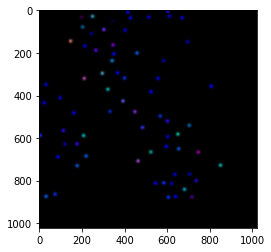

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mpm)

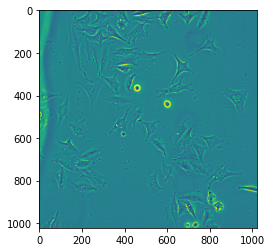

In [ ]:
import cv2

img = cv2.imread('/content/gdrive/MyDrive/Codes/Python/MOT/MPM/dataset/train_imgs/sequence_NIHT3_original/0000.tif', 0)
plt.imshow(img)

##Track the Cells with Pretrained MPM Model

In [ ]:
!python /content/gdrive/MyDrive/Codes/Python/MOT/MPM/mpm_tracker.py

-------0 - 1-------
-------1 - 2-------
# of associated cell: 19
appeared cell: 9
division cell: 0
not associated cell: 8
-------2 - 3-------
# of associated cell: 22
appeared cell: 5
division cell: 0
not associated cell: 6
-------3 - 4-------
# of associated cell: 11
appeared cell: 3
division cell: 0
not associated cell: 16
-------4 - 5-------
# of associated cell: 11
appeared cell: 19
division cell: 0
not associated cell: 3
-------5 - 6-------
# of associated cell: 17
appeared cell: 8
division cell: 0
not associated cell: 13
-------6 - 7-------
# of associated cell: 20
appeared cell: 7
division cell: 2
not associated cell: 7
-------7 - 8-------
# of associated cell: 20
appeared cell: 8
division cell: 0
not associated cell: 7
-------8 - 9-------
# of associated cell: 15
appeared cell: 3
division cell: 0
not associated cell: 13
-------9 - 10-------
# of associated cell: 11
appeared cell: 21
division cell: 0
not associated cell: 7
-------10 - 11-------
# of associated cell: 17
appeared 

In [ ]:
!ls output/track_log/

end_trajectory.num_frame  new_log.num_frame  tracking.states
mitosis_event.num_frame   tab.num_frame      tracking.tree


In [ ]:
!python /content/gdrive/MyDrive/Codes/Python/MOT/MPM/utils/visualize.py

In [ ]:
from google.colab import files

files.download('/content/checkpoints/CP_epoch100.pth') 

##Save Tracked Centroids

In [ ]:
import numpy as np
import pandas as pd

track_arr = np.loadtxt('/content/output/track_log/tracking.states', dtype='int')
df_tracked = pd.DataFrame(track_arr, columns = ['frame','id','x','y'])

In [ ]:
frames = df_tracked['frame'].unique()
all_centroids = []
for frame in frames:
    centroids = []
    xs = df_tracked[df_tracked['frame']==frame]['x'].values
    ys = df_tracked[df_tracked['frame']==frame]['y'].values
    for x, y in zip(xs, ys):
        centroids.append(np.array([x, y]))
    all_centroids.append(np.array(centroids))

all_centroids = np.array(all_centroids)
all_centroids.shape

(37,)

In [ ]:
np.save('mpm_tracked_NIH3T.npy', all_centroids)